## t-SNE to the plane

In [15]:
import pandas as pd

dffile = "./data/ec_rk0-2_cond1000-10000.csv"

df = pd.read_csv(dffile)
df

,ec,rank,conductor,a1,a2,a3,a4,a5,a6,a7,...,a991,a992,a993,a994,a995,a996,a997,a998,a999,a1000
0,1001.b1,0,1001,-1,0,-2,-1,1,-1,-2,...,-30,-78,100,-18,-90,136,-132,-106,-100,-48
1,1001.b2,0,1001,-1,0,-2,-1,1,-1,-2,...,-30,-78,100,-18,-90,136,-132,-106,-100,-48
2,1001.b3,0,1001,-1,0,-2,-1,1,-1,-2,...,-30,-78,100,-18,-90,136,-132,-106,-100,-48
3,1001.b4,0,1001,-1,0,-2,-1,1,-1,-2,...,-30,-78,100,-18,-90,136,-132,-106,-100,-48
4,1002.a1,0,1002,-1,-1,0,0,0,-4,6,...,50,154,152,-34,74,128,102,-96,116,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59568,9962.a1,2,9962,1,-1,-4,1,-4,-6,-1,...,-144,99,77,146,-36,108,72,-122,126,-49
59569,9963.c1,2,9963,0,0,-2,-4,2,-1,-2,...,94,-14,139,-127,36,-64,-88,42,114,-12
59570,9966.c1,2,9966,1,-1,-3,-4,-1,-3,-4,...,96,108,32,66,-46,-21,-67,110,94,86
59571,9978.a1,2,9978,-1,-1,-2,-1,-1,-2,-5,...,-117,31,174,101,-126,47,-111,21,54,-86


Quick check on the correctness of random data frame entries:

In [184]:
i = randint(0,df.shape[0]-1)
j = randint(1,1000)

E = EllipticCurve(QQ, df['ec'].values[i])
p = Primes().unrank(j-1)
a = 'a' + str(j)

print(E)
print(f'Prime {p}')
print(f'Check p+1-|Ep| = {df[a].values[i]} ... {p+1-E.Np(p) == df[a].values[i]}')
print(f'Check conductor = {df["conductor"].values[i]} ... {E.conductor() == df["conductor"].values[i]}')
print(f'Check rank = {df["rank"].values[i]} ... {E.rank() == df["rank"].values[i]}')

Elliptic Curve defined by y^2 + x*y = x^3 + x^2 - 959*x - 11835 over Rational Field
Prime 2719
Check p+1-|Ep| = 52 ... True
Check conductor = 4902 ... True
Check rank = 1 ... True


Extract array and compute t-SNE dimensional reduction:

In [108]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# sample rows uniformly
#ssize = 10000
#idx = sorted([choice(range(0,df.shape[0])) for _ in range(ssize)])

# or by size of conductor
idx = [i for i in range(df.shape[0]) if df["conductor"][i] > 8000]

# extract features to use
nprimes = 50
idy = ['a'+str(i) for i in range(1,nprimes + 1)]

# high-dimensional array
X = df[idy].iloc[idx].to_numpy()

# t-SNE computation
X_tsne = TSNE(n_components = 2).fit_transform(X)
print(f'tSNE frame {X_tsne.shape}')

# PCA decomposition for comparison
X_pca = PCA().fit_transform(X)
print(f'PCA frame {X_pca.shape}')

tSNE frame (13332, 2)
PCA frame (13332, 50)


Create new data frame (and write to file if necessary):

In [109]:
df_proj = df.iloc[idx][['ec','rank','conductor']]

df_proj['x1'] = X_tsne[:,0]
df_proj['x2'] = X_tsne[:,1]
df_proj['z1'] = X_pca[:,0]
df_proj['z2'] = X_pca[:,1]

df_proj

,ec,rank,conductor,x1,x2,z1,z2
21319,8001.g1,0,8001,-4.881057,23.511044,-10.347129,26.731359
21320,8004.b1,0,8004,52.991276,18.223883,-4.010063,3.165006
21321,8008.a1,0,8008,53.524780,40.033707,3.717208,8.889004
21322,8008.d1,0,8008,47.926708,-15.510921,34.905781,14.418343
21323,8008.d2,0,8008,47.926708,-15.510921,34.905781,14.418343
...,...,...,...,...,...,...,...
59568,9962.a1,2,9962,-57.186302,26.957439,-0.516179,-0.690176
59569,9963.c1,2,9963,-87.234421,46.908722,-16.694749,-3.869330
59570,9966.c1,2,9966,58.023922,-42.206940,17.606662,12.193398
59571,9978.a1,2,9978,-50.279778,-49.989655,-5.758134,-7.314361


Plot points in the plane: 

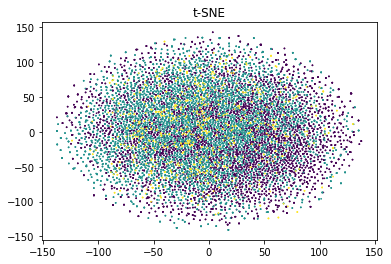

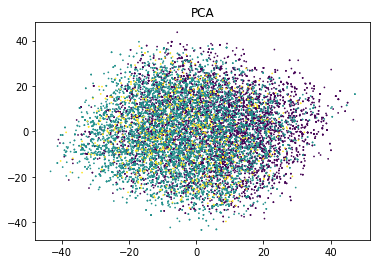

In [112]:
from matplotlib import pyplot as plt

c = df_proj['rank']

plt.figure(figsize=(10,10))
plt.scatter(df_proj['x1'],
            df_proj['x2'], 
            s=0.5, c=c)
plt.title("t-SNE")
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(df_proj['z1'],
            df_proj['z2'], 
            s=0.5, c=c)
plt.title("PCA")
plt.show()

## Taking initial window averages as feature vector

Motivated by the analysis in the notebook _primeseries_, we can see a better feature set to try: namely the vector of initial moving averages over succesively larger window sizes.

In [16]:
import numpy as np

# set prime range: based on murmuration plot we'll use a run of 100 primes either from p1 or from p450
nprimes = 100
first = 1
rg = range(first,first + nprimes)

# set features
v = ['a'+str(j) for j in rg]
for j in rg:
    df['b'+str(j)] = df[v[:j]].mean(axis=1)
    
df

,ec,rank,conductor,a1,a2,a3,a4,a5,a6,a7,...,b91,b92,b93,b94,b95,b96,b97,b98,b99,b100
0,1001.b1,0,1001,-1,0,-2,-1,1,-1,-2,...,2.373626,2.608696,2.924731,3.191489,3.115789,3.083333,3.360825,3.020408,2.787879,3.14
1,1001.b2,0,1001,-1,0,-2,-1,1,-1,-2,...,2.373626,2.608696,2.924731,3.191489,3.115789,3.083333,3.360825,3.020408,2.787879,3.14
2,1001.b3,0,1001,-1,0,-2,-1,1,-1,-2,...,2.373626,2.608696,2.924731,3.191489,3.115789,3.083333,3.360825,3.020408,2.787879,3.14
3,1001.b4,0,1001,-1,0,-2,-1,1,-1,-2,...,2.373626,2.608696,2.924731,3.191489,3.115789,3.083333,3.360825,3.020408,2.787879,3.14
4,1002.a1,0,1002,-1,-1,0,0,0,-4,6,...,1.307692,1.554348,1.365591,1.436170,1.231579,0.968750,1.061856,0.948980,0.696970,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59568,9962.a1,2,9962,1,-1,-4,1,-4,-6,-1,...,-1.857143,-1.445652,-1.591398,-1.744681,-1.747368,-1.708333,-1.742268,-2.000000,-2.414141,-2.73
59569,9963.c1,2,9963,0,0,-2,-4,2,-1,-2,...,0.637363,0.413043,0.677419,0.776596,0.305263,0.177083,0.587629,0.397959,0.484848,0.38
59570,9966.c1,2,9966,1,-1,-3,-4,-1,-3,-4,...,-1.186813,-1.391304,-0.967742,-0.968085,-0.905263,-0.697917,-1.061856,-1.275510,-1.404040,-1.43
59571,9978.a1,2,9978,-1,-1,-2,-1,-1,-2,-5,...,-1.065934,-0.826087,-0.903226,-1.106383,-0.715789,-0.583333,-0.670103,-1.071429,-0.858586,-1.05


Select rows/features and compute dimensional reductions:

In [19]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# sample rows uniformly
ssize = 30000
idx = sorted([choice(range(0,df.shape[0])) for _ in range(ssize)])

# or by size of conductor
#idx = [i for i in range(df.shape[0]) if df["conductor"][i] > 8000]

# extract features to use
idy = ['b'+str(i) for i in rg]

# high-dimensional array
X = df[idy].iloc[idx].to_numpy()

# t-SNE computation
X_tsne = TSNE(n_components = 2).fit_transform(X)
print(f'tSNE frame {X_tsne.shape}')

# PCA decomposition for comparison
X_pca = PCA().fit_transform(X)
print(f'PCA frame {X_pca.shape}')

# make data frame
df_proj = df.iloc[idx][['ec','rank','conductor']]

df_proj['x1'] = X_tsne[:,0]
df_proj['x2'] = X_tsne[:,1]
df_proj['z1'] = X_pca[:,0]
df_proj['z2'] = X_pca[:,1]

df_proj

tSNE frame (30000, 2)
PCA frame (30000, 100)


,ec,rank,conductor,x1,x2,z1,z2
7,1003.a1,0,1003,2.077822,102.278320,4.893284,6.837710
12,1006.a2,0,1006,-61.648754,69.380013,-5.572963,9.901486
12,1006.a2,0,1006,-61.648754,69.380013,-5.572963,9.901486
13,1008.a1,0,1008,-30.020344,3.351969,-12.873552,-0.487054
14,1008.a2,0,1008,-30.020771,3.352019,-12.873552,-0.487054
...,...,...,...,...,...,...,...
59565,9946.a1,2,9946,87.581299,-75.754440,19.158569,-3.259401
59566,9950.c1,2,9950,77.881439,-66.560226,15.275633,-4.433143
59566,9950.c1,2,9950,77.881104,-66.560188,15.275633,-4.433143
59570,9966.c1,2,9966,68.149551,-72.088005,12.080591,-10.343585


Check the rank distribution on this subframe:

In [20]:
from collections import Counter

Counter(df_proj["rank"])

Counter({1: 15144, 0: 13700, 2: 1156})

Plot the results:

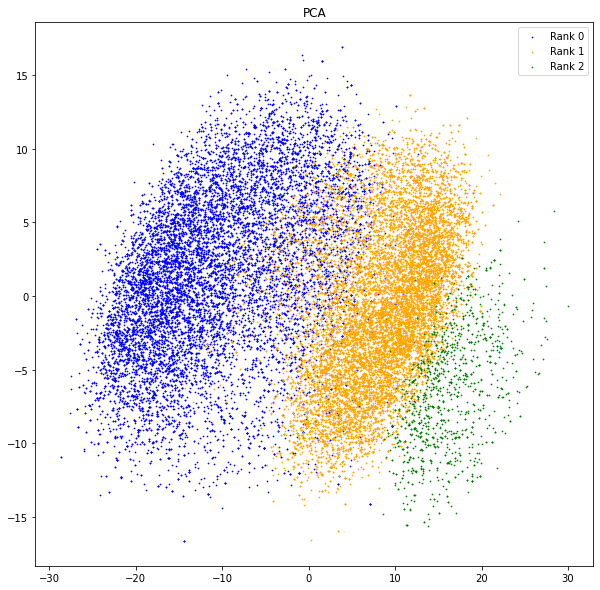

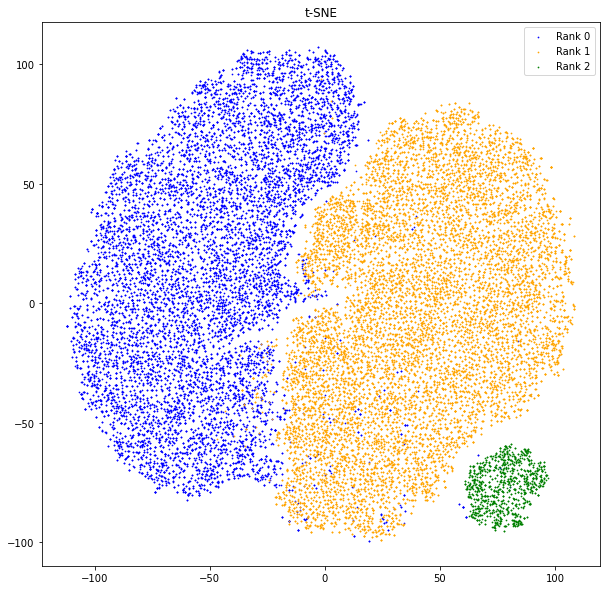

In [21]:
from matplotlib import pyplot as plt
from matplotlib import rc

rc('figure', figsize=(10, 10))

c = df_proj['rank']
col = ['blue', 'orange', 'green']

# PCA
fig, ax = plt.subplots()
for i in range(3):
    x = df_proj['z1'][c==i], 
    y = df_proj['z2'][c==i], 
    ax.scatter(x, y,
               s = 0.5,
               c=col[i], 
               label='Rank '+str(i))
ax.legend()
ax.grid(False)
plt.title('PCA')
plt.show()

# t-SNE
fig, ax = plt.subplots()
for i in range(3):
    x = df_proj['x1'][c==i], 
    y = df_proj['x2'][c==i], 
    ax.scatter(x, y,
               s = 0.5,
               c=col[i], 
               label='Rank '+str(i))
ax.legend()
ax.grid(False)
plt.title('t-SNE')
plt.show()

Save the results:

In [9]:
dffile = "./data/ec_rk0-2_cond1000-10000_proj.csv"
df_proj.to_csv(dffile, index=False)